In [1]:
# initialization cell

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from classy_sz import Class
from scipy.optimize import fsolve
from scipy.interpolate import interp1d
import math
import time
import os
current_path = os.getcwd()
path_to_files = current_path + '/../sz_auxiliary_files/'
import matplotlib.patches as mpatches

font = {'size'   : 16, 'family':'STIXGeneral'}
axislabelfontsize='large'
matplotlib.rc('font', **font)
# matplotlib.mathtext.rcParams['legend.fontsize']='medium'
# plt.rcParams["figure.figsize"] = [8.0,6.0]
# plt.rcParams.update({
#     "text.usetex": True,
#     "font.family": "sans-serif",
#     "font.sans-serif": ["Helvetica"]})

arcmin_to_radians = np.pi/(60.*180.)

In [13]:
# the parameters needed for cosmology:

cosmo_params = {
'omega_b': 0.02242,
'omega_cdm':  0.11933,
'h': 0.6766,
'tau_reio': 0.0561,
'ln10^{10}A_s': 3.047,
'n_s': 0.9665,

'k_pivot': 0.05,
'N_ncdm': 1,
'N_ur': 2.0328,
'm_ncdm': 0.06    

}

# the common parameters:

common_params = {

'z_min' : 0.005,
'z_max' : 4.0,
'non_linear' : 'halofit',


'redshift_epsabs': 1.0e-40,
'redshift_epsrel': 0.0001,


'ell_max': 1600.0,
'ell_min': 2.0,
'dell': 10,


}

other_class_sz_params =     {
'output':'gal_gal_hf,gal_lens_hf',

'galaxy_sample': 'custom',
'full_path_to_dndz_gal':'/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/wise_normalized.txt',   

'dlogell' : 0.,
'dell': 56.,
'ell_max' : 3000.0,
'ell_min' : 100.0,
'f_sky':0.6, 

'effective_galaxy_bias': 1.1,
'cl_gal_gal_A_sn' : 1.2566370614359172e-07,

'use scale dependent bias (from non Gaussianity)': 1,
'fNL' : 1e-1
    
      }



In [14]:
M = Class()

M.set(common_params)
M.set(cosmo_params)
M.set(other_class_sz_params)

ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
print(f"computed in {tf - ti:0.4f} seconds")

computed in 0.8268 seconds


In [15]:
ti = time.perf_counter()
class_sz_params_to_update = {}
M.compute_class_sz(class_sz_params_to_update)
tf = time.perf_counter()
print(f"computed in {tf - ti:0.4f} seconds")

computed in 0.0326 seconds


In [16]:
fnl_ar = np.geomspace(1e2,1e6,50)
cls_gg = []
cls_kg = []
ti = time.perf_counter()
for fnl in fnl_ar:
    class_sz_params_to_update={'fNL':fnl}
    M.compute_class_sz(class_sz_params_to_update)
    cls_gg.append(M.cl_gg())
    cls_kg.append(M.cl_kg())
tf = time.perf_counter()
print(f"computed in {tf - ti:0.4f} seconds")

computed in 0.8770 seconds


Text(0.5, 1.0, 'galaxy x galaxy')

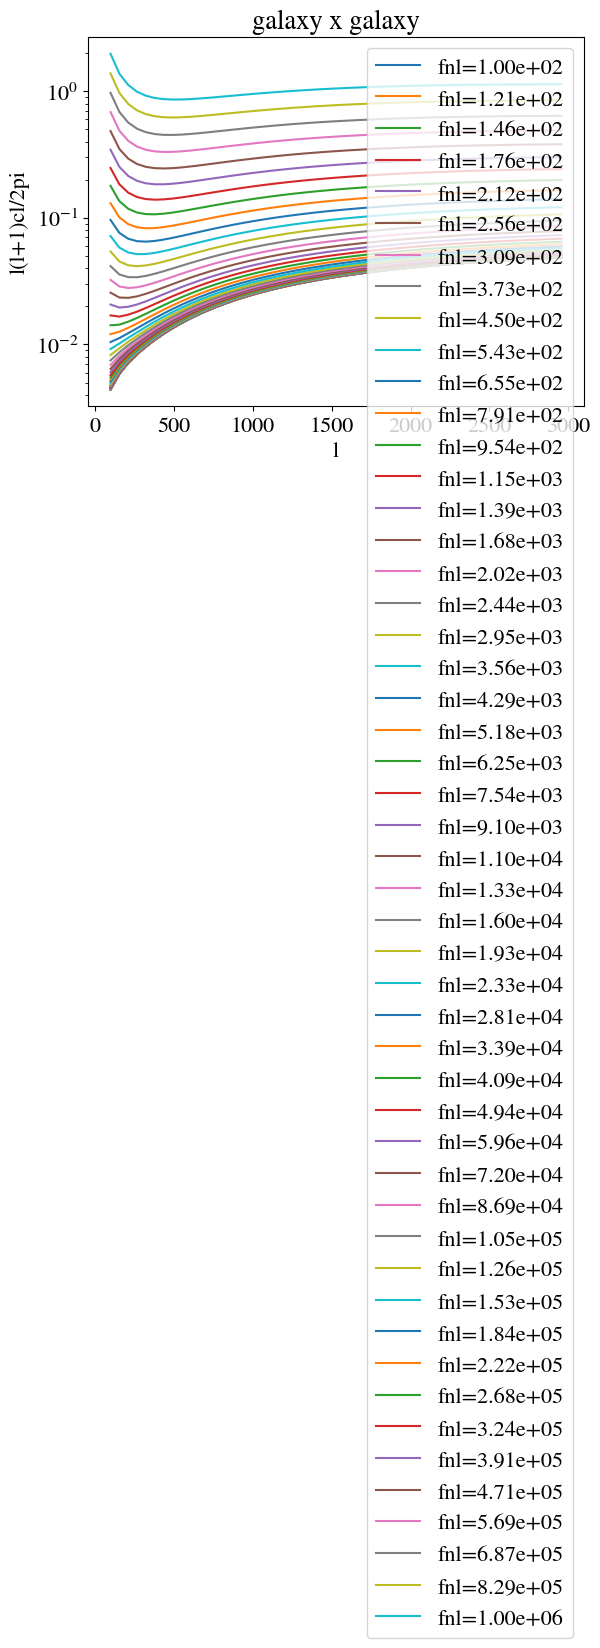

In [17]:
for (i,fnl) in enumerate(fnl_ar):
    plt.plot(M.cl_gg()['ell'],cls_gg[i]['hf'],label="fnl=%.2e"%fnl)
plt.legend()
plt.yscale('log')
plt.ylabel('l(l+1)cl/2pi')
plt.xlabel('l')
plt.title('galaxy x galaxy')

In [5]:
get_scale_dependent_bias_at_z_and_k = np.vectorize(M.get_scale_dependent_bias_at_z_and_k)

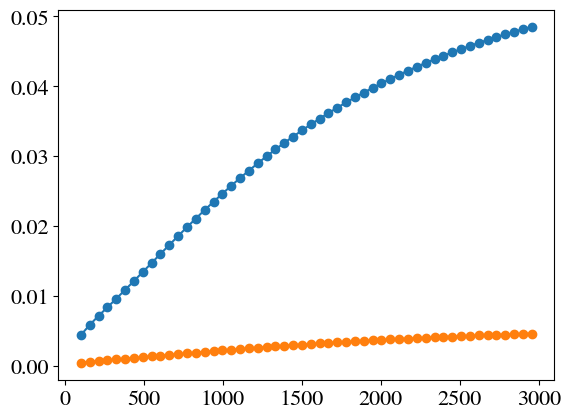

In [6]:
plt.plot(M.cl_gg()['ell'],np.asarray(M.cl_gg()['hf'])/1**2,marker='o')
plt.plot(M.cl_gg()['ell'],np.asarray(M.cl_kg()['hf'])/1**2,marker='o')

In [7]:
zp = 0.5
kp = 1e-2 # in h/Mpc
bp = 1.1
get_scale_dependent_bias_at_z_and_k(zp,kp,bp)

array(3.76079049e-05)

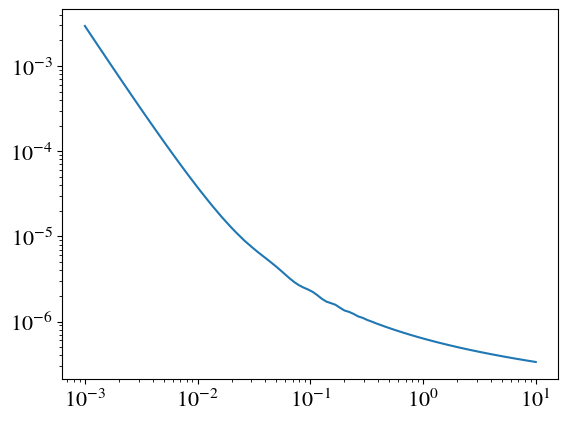

In [8]:
k_ar = np.geomspace(1e-3,1e1,100)
plt.plot(k_ar,get_scale_dependent_bias_at_z_and_k(zp,k_ar,bp))
plt.xscale('log')
plt.yscale('log')

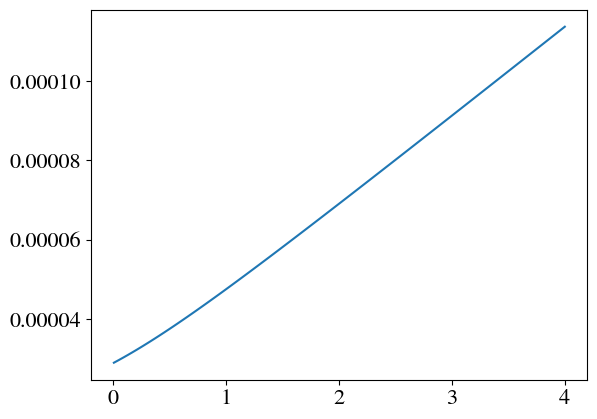

In [9]:
z_ar = np.linspace(5e-3,4,100)
plt.plot(z_ar,get_scale_dependent_bias_at_z_and_k(z_ar,kp,bp))
plt.xscale('linear')
plt.yscale('linear')

In [14]:
fnl_ar = np.geomspace(1e2,1e6,5)
cls_gg = []
cls_kg = []
for fnl in fnl_ar:
    M.set({'fNL' : fnl})
    M.compute_class_sz()
    cls_gg.append(M.cl_gg())
    cls_kg.append(M.cl_kg())

Text(0.5, 1.0, 'galaxy x galaxy')

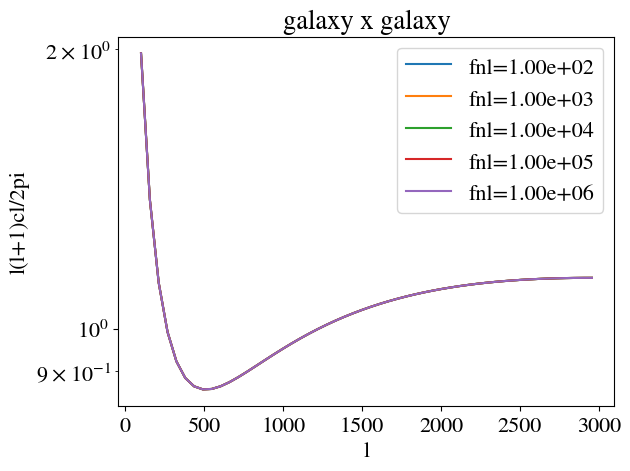

In [15]:
for (i,fnl) in enumerate(fnl_ar):
    plt.plot(M.cl_gg()['ell'],cls_gg[i]['hf'],label="fnl=%.2e"%fnl)
plt.legend()
plt.yscale('log')
plt.ylabel('l(l+1)cl/2pi')
plt.xlabel('l')
plt.title('galaxy x galaxy')

Text(0.5, 1.0, 'kappa x galaxy')

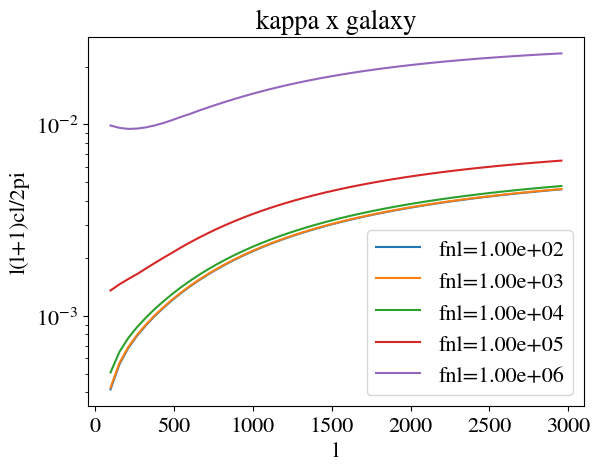

In [16]:
for (i,fnl) in enumerate(fnl_ar):
    plt.plot(M.cl_kg()['ell'],cls_kg[i]['hf'],label="fnl=%.2e"%fnl)
plt.legend()
plt.yscale('log')
plt.ylabel('l(l+1)cl/2pi')
plt.xlabel('l')
plt.title('kappa x galaxy')

Text(0.5, 1.0, 'kappa x galaxy')

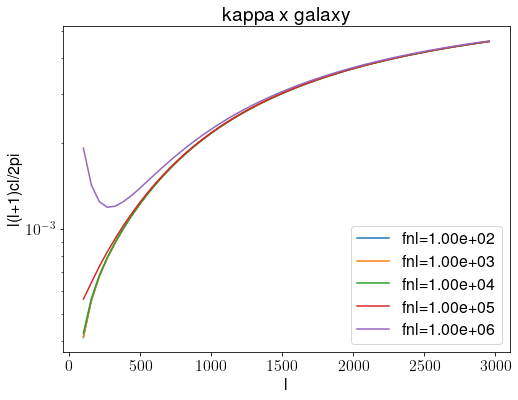

In [11]:
for (i,fnl) in enumerate(fnl_ar):
    plt.plot(M.cl_kg()['ell'],cls_kg[i]['hf'],label="fnl=%.2e"%fnl)
plt.legend()
plt.yscale('log')
plt.ylabel('l(l+1)cl/2pi')
plt.xlabel('l')
plt.title('kappa x galaxy')

In [4]:
M = Class()

M.set(common_params)
M.set(cosmo_params)
M.set(bestfit_green_hod_params)


M.set(
    {
'output':'gal_gal_1h,gal_gal_2h,lensmag_lensmag_1h,lensmag_lensmag_2h',

'galaxy_sample': 'custom',
'full_path_to_dndz_gal':'/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/wise_normalized.txt',   

'dlogell' : 0.,
'dell': 56.,
'ell_max' : 3000.0,
'ell_min' : 100.0,
'f_sky':0.6, 

'effective_galaxy_bias': 1.1,
'cl_gal_gal_A_sn' : 1.2566370614359172e-07,

'use scale dependent bias (from non Gaussianity)': 1,
'fNL' : 1e-1
    
      })

ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
print(f"computed in {tf - ti:0.4f} seconds")

computed in 2.9487 seconds


In [5]:
M.cl_mm()['2h']

[1.5409328010134642e-06,
 1.6899391943403857e-06,
 1.7196136441644563e-06,
 1.7067099040391903e-06,
 1.6763842014692231e-06,
 1.6299621897163165e-06,
 1.58427038330397e-06,
 1.537673093171478e-06,
 1.4918532739512863e-06,
 1.4465361535215076e-06,
 1.404610699669933e-06,
 1.3634939208616552e-06,
 1.3241368982486397e-06,
 1.2866129219187697e-06,
 1.2508076281969873e-06,
 1.2165727221684832e-06,
 1.1839619186704305e-06,
 1.15276665592857e-06,
 1.1228382900077856e-06,
 1.094383450381326e-06,
 1.0671163479468444e-06,
 1.0410453826591004e-06,
 1.015985196384569e-06,
 9.919678559485058e-07,
 9.6898254163856e-07,
 9.469200118307114e-07,
 9.254724025851975e-07,
 9.049441191565152e-07,
 8.851453702559891e-07,
 8.660633002429793e-07,
 8.477704323966004e-07,
 8.301296994377949e-07,
 8.131154492243745e-07,
 7.966936377383653e-07,
 7.8083782666635e-07,
 7.65514478368628e-07,
 7.507099833326231e-07,
 7.363934927497838e-07,
 7.225465365654181e-07,
 7.091412518892771e-07,
 6.960189831606053e-07,
 6.835